# 1. Setup Environment

### 1.1. Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import kurtosis, norm, skew, median_abs_deviation

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1.2. Import Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Work\Desktop\MS Pub\GSA\grackle_20k8p_illinois.csv')

# 2. Data Exploration

### 2.1. Features

In [3]:
data.sample(5)
data.shape

,ID,ClutchSize,FledgeRate,FledglingSurvival,InitialAbundance,JuvenileSurvival,AdultSurvival,SYBreeding,ASYBreeding,Output
15378,15378,4.381691,0.376948,0.586867,2.737579e+06,0.554299,0.700840,0.878032,0.987021,316010.913666
8115,8115,4.243075,0.365436,0.594701,2.738938e+06,0.548819,0.668031,0.908998,0.968208,20520.393605
10580,10580,4.558070,0.358108,0.586205,2.883546e+06,0.577932,0.675139,0.864739,0.953242,82105.379718
8947,8947,4.525864,0.349406,0.594532,2.880514e+06,0.562257,0.654644,0.904996,0.917780,13738.959031
11798,11798,4.329801,0.376031,0.598917,2.840484e+06,0.586315,0.687359,0.866055,0.995953,358239.148178


(20000, 10)

In [4]:
params = data.iloc[:, 1:-1].select_dtypes(include=[np.number]).columns.tolist()
target = 'Output'

### 2.2. Feature Locations

In [5]:
data[params].describe()

,ClutchSize,FledgeRate,FledglingSurvival,InitialAbundance,JuvenileSurvival,AdultSurvival,SYBreeding,ASYBreeding
count,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.354500,0.361000,0.617000,2.800000e+06,0.560000,0.675000,0.900000,0.950000
std,0.125577,0.010393,0.017898,8.083102e+04,0.016166,0.019630,0.025981,0.027425
min,4.137005,0.343000,0.586002,2.660013e+06,0.532003,0.641001,0.855003,0.902503
25%,4.245747,0.352001,0.601502,2.730006e+06,0.546001,0.658001,0.877500,0.926251
50%,4.354508,0.361000,0.617000,2.800002e+06,0.560001,0.675000,0.900001,0.949999
75%,4.463248,0.369999,0.632499,2.869999e+06,0.573999,0.691999,0.922500,0.973747
max,4.571981,0.378998,0.647998,2.939999e+06,0.587998,0.709000,0.944999,0.997498


In [6]:
data[['Output']].describe()

,Output
count,2.000000e+04
mean,1.628003e+05
std,2.687501e+05
min,1.266148e+03
25%,2.623292e+04
50%,7.128828e+04
75%,1.873596e+05
max,7.536484e+06


### 2.3. Feature Distributions

In [7]:
def distReport(data, feature, s=True, k=True):
    s = abs(skew(data[feature], nan_policy='omit'))
    k = abs(kurtosis(data[feature], nan_policy='omit'))
    return [s, k]

In [8]:
distReport(data, ['ClutchSize'], s=True, k=True)

[array([3.68963427e-07]), array([1.20000257])]

<AxesSubplot:xlabel='ClutchSize', ylabel='Density'>

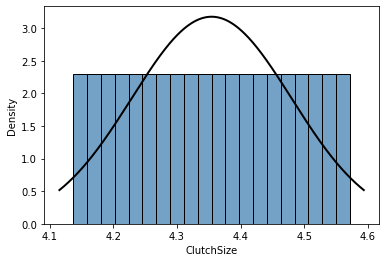

In [9]:
sns.histplot(x='ClutchSize', stat='density', bins=20, color='steelblue', edgecolor='black', data=data)

mu, sigma = norm.fit(np.array(data['ClutchSize'].dropna()))
xmin, xmax = plt.xlim()
domain = np.linspace(xmin, xmax, 1000)
plt.plot(domain, norm.pdf(domain, mu, sigma), color='black', linewidth=2)

In [10]:
distReport(data, ['Output'], s=True, k=True)

[array([5.67628948]), array([66.58710634])]

<AxesSubplot:xlabel='Output', ylabel='Density'>

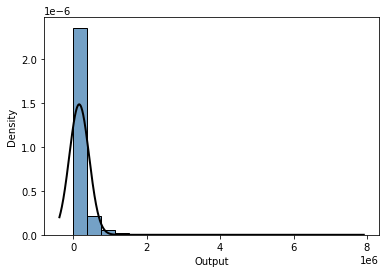

In [11]:
sns.histplot(x='Output', stat='density', bins=20, color='steelblue', edgecolor='black', data=data)

mu, sigma = norm.fit(np.array(data['Output'].dropna()))
xmin, xmax = plt.xlim()
domain = np.linspace(xmin, xmax, 1000)
plt.plot(domain, norm.pdf(domain, mu, sigma), color='black', linewidth=2)

# 3. Outlier Treatment

### 3.1. Option 1: Remove Outliers Using MAD

In [12]:
def outliersMAD(data):
    m = np.median(data)
    mad = median_abs_deviation(x=data, axis=0, scale=1)
    lower = m - (3 * mad)
    upper = m + (3 * mad)
    return lower, upper

In [13]:
mad = outliersMAD(data['Output'])

In [14]:
data_rob = data.loc[(data['Output'] >= mad[0]) & (data['Output'] <= mad[1])]

<AxesSubplot:xlabel='Output', ylabel='Density'>

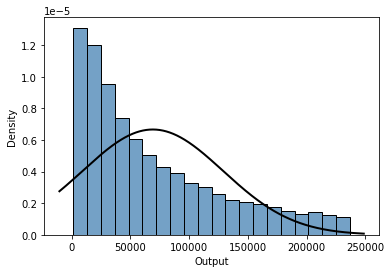

In [15]:
sns.histplot(x='Output', stat='density', bins=20, color='steelblue', edgecolor='black', data=data_rob)

mu, sigma = norm.fit(np.array(data_rob['Output'].dropna()))
xmin, xmax = plt.xlim()
domain = np.linspace(xmin, xmax, 1000)
plt.plot(domain, norm.pdf(domain, mu, sigma), color='black', linewidth=2)

In [16]:
data.shape
data_rob.shape

(20000, 10)

(16028, 10)

### 3.2. Option 2: Log Transform

In [17]:
data_log = data.copy()
data_log['Output'] = np.log(data_log['Output'])

<AxesSubplot:xlabel='Output', ylabel='Density'>

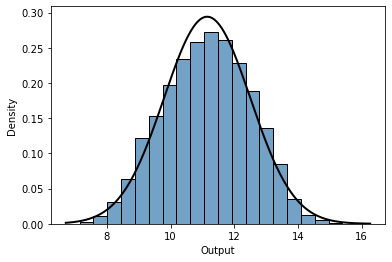

In [18]:
sns.histplot(x='Output', stat='density', bins=20, color='steelblue', edgecolor='black', data=data_log)

mu, sigma = norm.fit(np.array(data_log['Output'].dropna()))
xmin, xmax = plt.xlim()
domain = np.linspace(xmin, xmax, 1000)
plt.plot(domain, norm.pdf(domain, mu, sigma), color='black', linewidth=2)

### 3.3. Option 3: Remove Outliers and Log Transform

In [19]:
mad = outliersMAD(data_log['Output'])
mad

(8.226509152416233, 14.122465296644686)

In [20]:
data_rob_log = data_log.loc[(data_log['Output'] >= mad[0]) & (data_log['Output'] <= mad[1])]

<AxesSubplot:xlabel='Output', ylabel='Density'>

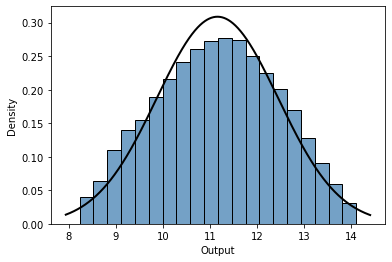

In [21]:
sns.histplot(x='Output', stat='density', bins=20, color='steelblue', edgecolor='black', data=data_rob_log)

mu, sigma = norm.fit(np.array(data_rob_log['Output'].dropna()))
xmin, xmax = plt.xlim()
domain = np.linspace(xmin, xmax, 1000)
plt.plot(domain, norm.pdf(domain, mu, sigma), color='black', linewidth=2)

# 4. Export Dataset

In [22]:
data.to_csv(r'C:\Users\Work\Desktop\MS Pub\GSA\grackle_20k8p_illinois_skewed.csv', header=True, index=False)
data_rob.to_csv(r'C:\Users\Work\Desktop\MS Pub\GSA\grackle_20k8p_illinois_rob.csv', header=True, index=False)
data_log.to_csv(r'C:\Users\Work\Desktop\MS Pub\GSA\grackle_20k8p_illinois_log.csv', header=True, index=False)
data_rob_log.to_csv(r'C:\Users\Work\Desktop\MS Pub\GSA\grackle_20k8p_illinois_rob_log.csv', header=True, index=False)